In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# 定义棋盘格的行数和列数
ROWS = 23
COLS = 17

# 定义世界坐标系中的棋盘格角点
objp = np.zeros((ROWS * COLS, 3), np.float32)
objp[:, :2] = np.mgrid[0:COLS, 0:ROWS].T.reshape(-1, 2)

# 存储所有图像中的对象点和图像点
objpoints = []  # 3D points in real world space
imgpoints = []  # 2D points in image plane

In [15]:
images = [
    'F:/Source-code-management-repository/MyHome/Machine vision/Data/1.bmp',
    'F:/Source-code-management-repository/MyHome/Machine vision/Data/2.bmp',
    'F:/Source-code-management-repository/MyHome/Machine vision/Data/3.bmp',
    'F:/Source-code-management-repository/MyHome/Machine vision/Data/4.bmp',
    'F:/Source-code-management-repository/MyHome/Machine vision/Data/5.bmp',
    'F:/Source-code-management-repository/MyHome/Machine vision/Data/6.bmp',
    'F:/Source-code-management-repository/MyHome/Machine vision/Data/7.bmp',
    'F:/Source-code-management-repository/MyHome/Machine vision/Data/8.bmp',
    'F:/Source-code-management-repository/MyHome/Machine vision/Data/9.bmp',
    'F:/Source-code-management-repository/MyHome/Machine vision/Data/10.bmp',
    'F:/Source-code-management-repository/MyHome/Machine vision/Data/11.bmp',
    'F:/Source-code-management-repository/MyHome/Machine vision/Data/12.bmp',
    'F:/Source-code-management-repository/MyHome/Machine vision/Data/13.bmp',
    'F:/Source-code-management-repository/MyHome/Machine vision/Data/14.bmp',
    'F:/Source-code-management-repository/MyHome/Machine vision/Data/15.bmp',
    'F:/Source-code-management-repository/MyHome/Machine vision/Data/16.bmp',
    'F:/Source-code-management-repository/MyHome/Machine vision/Data/17.bmp',
]

In [16]:
count = 0  # 初始化计数器，记录当前是第几张图
for fname in images:
    count += 1  # 每张图计数加1
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 查找棋盘格角点
    ret, corners = cv2.findChessboardCorners(gray, (COLS, ROWS), None)

    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

        # 绘制角点
        cv2.drawChessboardCorners(img, (COLS, ROWS), corners, ret)
        cv2.imshow('img', img)
        cv2.waitKey(500)
    
    # 标定相机
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

    # 输出时添加当前是第几张图的信息
    print(f"第{count}张图(文件名：{fname})")
    print("相机矩阵:")
    print(mtx)
    print("\n畸变系数:")
    print(dist)

cv2.destroyAllWindows()

第1张图(文件名：F:/Source-code-management-repository/MyHome/Machine vision/Data/1.bmp)
相机矩阵:
[[232.76309549   0.         327.65100373]
 [  0.         232.65582775 233.33475797]
 [  0.           0.           1.        ]]

畸变系数:
[[-1.23916934e-01  2.22216959e-02 -5.80647658e-04 -1.19082551e-05
  -2.71729126e-03]]
第2张图(文件名：F:/Source-code-management-repository/MyHome/Machine vision/Data/2.bmp)
相机矩阵:
[[338.00938989   0.         327.86045463]
 [  0.         337.94478267 229.78724625]
 [  0.           0.           1.        ]]

畸变系数:
[[-0.25418001  0.08151919  0.00094306  0.00028481 -0.01435715]]
第3张图(文件名：F:/Source-code-management-repository/MyHome/Machine vision/Data/3.bmp)
相机矩阵:
[[336.9746734    0.         327.83053082]
 [  0.         336.91994765 229.65985093]
 [  0.           0.           1.        ]]

畸变系数:
[[-0.25291218  0.08111806  0.00098475  0.00031427 -0.01433903]]
第4张图(文件名：F:/Source-code-management-repository/MyHome/Machine vision/Data/4.bmp)
相机矩阵:
[[338.08595081   0.         327.75043151

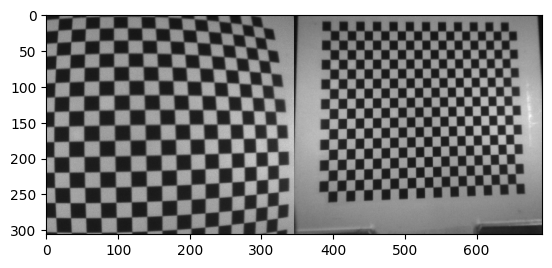

In [24]:
# 假设已经得到了标定参数 mtx, dist 

if ret: 
    # 选择一张图像进行矫正，例如第一张图像 
    image_to_undistort_path = images[4] 
    img_to_undistort = cv2.imread(image_to_undistort_path) 
    if img_to_undistort is None: 
        print("错误：无法读取矫正图像。") 
    else: 
        h, w = img_to_undistort.shape[:2] 
 
        # 用户可调整的参数 
        alpha = 0.85  # 0-1之间，1表示保留所有原始像素（有黑边），0表示尽可能裁剪掉黑边 
        crop = True   # 是否裁剪黑边 
 
        # 计算新的最优相机矩阵 
        newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), alpha, (w, h)) 
 
        # 方法1：使用undistort 
        dst = cv2.undistort(img_to_undistort, mtx, dist, None, newcameramtx) 

        # 如果选择裁剪，则根据ROI裁剪 
        if crop and roi != (0,0,0,0):  # roi是一个元组(x, y, w, h) 
            x, y, w_roi, h_roi = roi 
            dst = dst[y:y+h_roi, x:x+w_roi] 
            # 原始图像也进行同样裁剪，以便对比 
            img_to_undistort_cropped = img_to_undistort[y:y+h_roi, x:x+w_roi] 
        else: 
            img_to_undistort_cropped = img_to_undistort  # 如果不裁剪，则原始图像也不裁剪，但注意矫正后的图像有黑边 
 
        # 显示矫正前后的对比 
        # 将两张图片水平拼接 
        combined = np.hstack((img_to_undistort_cropped, dst)) 
 
        # 保存矫正后的图像（无损格式） 
        cv2.imwrite('undistorted.png', dst, [cv2.IMWRITE_PNG_COMPRESSION, 0]) 
        im = cv2.imread('矫正前后对比 - 左: 原始图像 | 右: 矫正后图像', combined)
        plt.imshow(im)
else: 
    print("标定失败，无法进行图像矫正。") 
